Importamos todas las librerias necesarias en el notebook

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
import sys
from scipy import stats

In [2]:
seaborn.__version__

'0.9.0'

Leemos el dataset correspondiente al primer practico.

In [ ]:
dataset = pandas.read_csv('meli_dataset_20190426.csv')

Verificamos que en las filas importadas al menos una columna tenga valor

In [31]:
data = dataset.shape
data_dropna = dataset.dropna(how='all').shape
print(data, data_dropna)

(499948, 13) (499948, 13)


Listamos los nombres de las columnas.

In [5]:
dataset.columns

Index(['ITEM_ID', 'SHP_WEIGHT', 'SHP_LENGTH', 'SHP_WIDTH', 'SHP_HEIGHT',
       'ATTRIBUTES', 'CATALOG_PRODUCT_ID', 'CONDITION', 'DOMAIN_ID', 'PRICE',
       'SELLER_ID', 'STATUS', 'TITLE'],
      dtype='object')

In [32]:
dataset.dtypes

ITEM_ID                object
SHP_WEIGHT            float64
SHP_LENGTH            float64
SHP_WIDTH             float64
SHP_HEIGHT            float64
ATTRIBUTES             object
CATALOG_PRODUCT_ID     object
CONDITION              object
DOMAIN_ID              object
PRICE                 float64
SELLER_ID              object
STATUS                 object
TITLE                  object
dtype: object

In [33]:
dataset.describe()

,SHP_WEIGHT,SHP_LENGTH,SHP_WIDTH,SHP_HEIGHT,PRICE
count,347751.000000,347751.000000,347751.000000,347751.000000,3.685440e+05
mean,1854.789579,31.451148,21.290276,11.578580,1.206323e+03
std,3257.884009,18.339895,11.217308,8.310821,5.018810e+05
min,1.000000,0.000000,0.000000,0.000000,1.000000e-01
25%,260.000000,20.000000,13.000000,5.000000,4.490000e+01
50%,675.000000,25.000000,20.000000,10.000000,9.500000e+01
75%,1900.000000,36.000000,25.000000,16.000000,1.720000e+02
max,50000.000000,288.200000,165.000000,105.000000,3.032487e+08


In [34]:
dataset.describe(include=['object'])

,ITEM_ID,ATTRIBUTES,CATALOG_PRODUCT_ID,CONDITION,DOMAIN_ID,SELLER_ID,STATUS,TITLE
count,499948,368544,499948,368544,367555,421587,499948,421587
unique,384501,245622,15553,3,2853,61781,6,306233
top,EZ118KZWRZ,"[{'id': 'ITEM_CONDITION', 'name': 'Condição do...",H53U1H7Q5G,new,MLB-VEHICLE_ACCESSORIES,XYDSNCU3UV,active,Maquininha Point Mini - A Máquina De Cartão Do...
freq,275,16435,450354,365978,9100,842,226459,297


Como la cantidad de filas es 499948, viendo la salida de los describe() vemos que las columnas ITEM_ID, CATALOG_PRODUCT_ID y STATUS siempre tienen datos no nulos.  Despues en cantidad de datos no nulos le siguen SELLER_ID y TITLE con 421587. Luego ATTRIBUTES, CONDITION y PRICE con 368544. Luego DOMAIN_ID con 367555. Y finalmente las dimensiones y peso con 347751.

In [35]:
dataset['STATUS'].unique()

array(['404', 'active', 'closed', 'paused', 'under_review', 'inactive'],
      dtype=object)

De la inspeccion visual del csv vimos que cuando el STATUS es 404 faltan muchos valores en esas filas

In [36]:
dataset[dataset['STATUS']=='404'].describe()

,SHP_WEIGHT,SHP_LENGTH,SHP_WIDTH,SHP_HEIGHT,PRICE
count,51426.000000,51426.000000,51426.000000,51426.000000,0.0
mean,1818.350834,31.599409,21.130255,11.672103,NaN
std,3276.261074,16.640029,10.719176,8.031358,NaN
min,1.000000,0.000000,0.000000,0.000000,NaN
25%,287.000000,23.000000,14.000000,5.000000,NaN
50%,661.000000,25.350000,20.000000,10.000000,NaN
75%,1653.750000,40.000000,25.000000,15.000000,NaN
max,50000.000000,245.000000,100.000000,80.000000,NaN


In [38]:
dataset[dataset['STATUS']=='404'].describe(include=['object'])

,ITEM_ID,ATTRIBUTES,CATALOG_PRODUCT_ID,CONDITION,DOMAIN_ID,SELLER_ID,STATUS,TITLE
count,78361,0.0,78361,0.0,0.0,0.0,78361,0.0
unique,65731,0.0,1,0.0,0.0,0.0,1,0.0
top,JALU4QINA2,NaN,H53U1H7Q5G,NaN,NaN,NaN,404,NaN
freq,89,NaN,78361,NaN,NaN,NaN,78361,NaN


Confirmamos que cuando STATUS es 404 no hay valores en ATTRIBUTES, CONDITION, DOMAIN_ID, SELLER_ID y TITLE. Para ITEM_ID, CATALOG_PRODUCT_ID y STATUS ya sabiamos que estaban en todas las filas. Lo que es llamativo es que con STATUS en 404 existen pesos y dimensiones.

In [42]:
#sacamos los 404 y dominios nulos
cc=['404']
filtrado = dataset[ ~dataset.DOMAIN_ID.isnull() & ~dataset.STATUS.isin(cc)]
filtrado.shape

(367555, 13)

Verificamos si estamos dejando filas con DOMAIN no vacios. Vemos que la falta de valor DOMAIN coincide perfectamente con el STATUS==404 ya que el siguientes filtrado nos da igual que el anterior.

In [43]:
dataset[ ~dataset.DOMAIN_ID.isnull()].shape

(367555, 13)

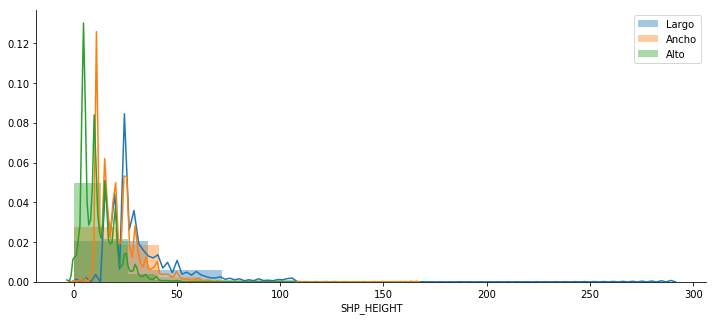

In [10]:
#graficamos distribuciones
plt.figure(figsize=(12,5))
seaborn.distplot(filtrado['SHP_LENGTH'].dropna(), bins=8, label='Largo')
seaborn.distplot(filtrado['SHP_WIDTH'].dropna(), bins=8, label='Ancho')
seaborn.distplot(filtrado['SHP_HEIGHT'].dropna(), bins=8, label='Alto')
plt.legend()
seaborn.despine()

In [11]:
box = filtrado[['SHP_LENGTH','SHP_WIDTH','SHP_HEIGHT']]

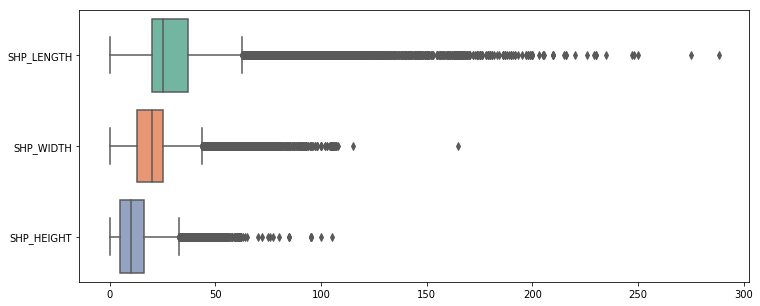

In [12]:
#graficamos outliers
plt.figure(figsize=(12,5))
seaborn.boxplot(data=box, orient="h", palette="Set2")

In [13]:
largo = filtrado['SHP_LENGTH']
ancho = filtrado['SHP_WIDTH']
alto  = filtrado['SHP_HEIGHT']

In [14]:
#CATEGORIAS MAS Homogeneas
valor = 3
filtro1 = largo.mask(numpy.abs(largo-largo.mean()) <= (valor*largo.std()))
filtro2 = ancho.mask(numpy.abs(ancho-ancho.mean()) <= (valor*ancho.std()))
filtro3 = alto.mask(numpy.abs(alto-alto.mean()) <= (valor*alto.std()))

#print(filtro1.count(), filtro2.count(), filtro3.count())

LargoFiltrado = filtrado.mask(filtrado['SHP_LENGTH'].isin(filtro1)).dropna()
AnchoFiltrado = LargoFiltrado.mask(LargoFiltrado['SHP_WIDTH'].isin(filtro2).dropna())
NuevoFiltrado = AnchoFiltrado.mask(AnchoFiltrado['SHP_HEIGHT'].isin(filtro3).dropna())

valor = 3000
dominios = NuevoFiltrado.groupby(['DOMAIN_ID']).count()
dominios.where(NuevoFiltrado.groupby(['DOMAIN_ID']).count() > valor).dropna()

,ITEM_ID,SHP_WEIGHT,SHP_LENGTH,SHP_WIDTH,SHP_HEIGHT,ATTRIBUTES,CATALOG_PRODUCT_ID,CONDITION,PRICE,SELLER_ID,STATUS,TITLE
DOMAIN_ID,,,,,,,,,,,,
MLB-BACKPACKS,3089.0,3089.0,3089.0,3089.0,3089.0,3089.0,3089.0,3089.0,3089.0,3089.0,3089.0,3089.0
MLB-HAIR_TREATMENTS,3267.0,3267.0,3267.0,3267.0,3267.0,3267.0,3267.0,3267.0,3267.0,3267.0,3267.0,3267.0
MLB-SUPPLEMENTS,5770.0,5770.0,5770.0,5770.0,5770.0,5770.0,5770.0,5770.0,5770.0,5770.0,5770.0,5770.0
MLB-VEHICLE_ACCESSORIES,6469.0,6469.0,6469.0,6469.0,6469.0,6469.0,6469.0,6469.0,6469.0,6469.0,6469.0,6469.0
MLB-VEHICLE_PARTS,4170.0,4170.0,4170.0,4170.0,4170.0,4170.0,4170.0,4170.0,4170.0,4170.0,4170.0,4170.0


In [15]:
#CATEGORIAS MAS Heterogeneas
valor = 3
filtro1 = largo.mask(numpy.abs(largo-largo.mean()) >= (valor*largo.std()))
filtro2 = ancho.mask(numpy.abs(ancho-ancho.mean()) >= (valor*ancho.std()))
filtro3 = alto.mask(numpy.abs(alto-alto.mean()) >= (valor*alto.std()))

#print(filtro1.count(), filtro2.count(), filtro3.count())

LargoFiltrado = filtrado.mask(filtrado['SHP_LENGTH'].isin(filtro1)).dropna()
AnchoFiltrado = LargoFiltrado.mask(LargoFiltrado['SHP_WIDTH'].isin(filtro2).dropna())
NuevoFiltrado = AnchoFiltrado.mask(AnchoFiltrado['SHP_HEIGHT'].isin(filtro3).dropna())

valor = 4
dominios = NuevoFiltrado.groupby(['DOMAIN_ID']).count()
dominios.where(NuevoFiltrado.groupby(['DOMAIN_ID']).count() > valor).dropna()

,ITEM_ID,SHP_WEIGHT,SHP_LENGTH,SHP_WIDTH,SHP_HEIGHT,ATTRIBUTES,CATALOG_PRODUCT_ID,CONDITION,PRICE,SELLER_ID,STATUS,TITLE
DOMAIN_ID,,,,,,,,,,,,
MLB-BABY_PUZZLE_PLAY_MATS,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
MLB-PACKAGING_ROLLS,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
MLB-RUBBER_FLOORS,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
MLB-STOOLS,137.0,137.0,137.0,137.0,137.0,137.0,137.0,137.0,137.0,137.0,137.0,137.0


In [16]:
dominio = filtrado['DOMAIN_ID']
filtrado.where(dominio == 'MLB-BACKPACKS').dropna().mean()

SHP_WEIGHT    1176.182430
SHP_LENGTH      36.158576
SHP_WIDTH       26.306797
SHP_HEIGHT      12.316929
PRICE          142.667538
dtype: float64

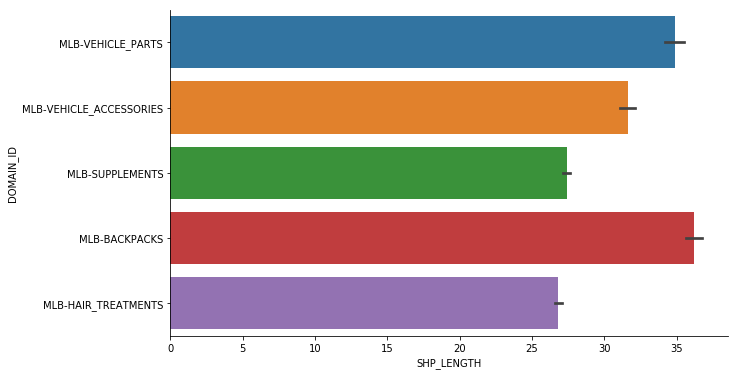

In [17]:
homogeneos = ('MLB-BACKPACKS', 'MLB-HAIR_TREATMENTS', 'MLB-SUPPLEMENTS', 'MLB-VEHICLE_ACCESSORIES', 'MLB-VEHICLE_PARTS')
homog_data = filtrado[filtrado['DOMAIN_ID'].isin(homogeneos)]

plt.figure(figsize=(10,6))
seaborn.barplot(data=homog_data, y='DOMAIN_ID', x='SHP_LENGTH')
seaborn.despine()

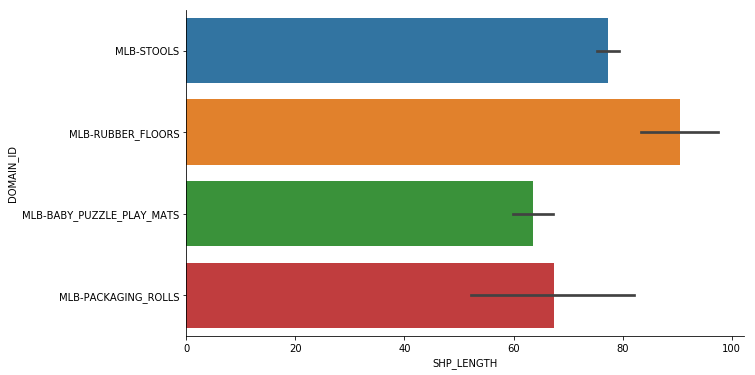

In [18]:
heterogeneos = ('MLB-BABY_PUZZLE_PLAY_MATS', 'MLB-PACKAGING_ROLLS', 'MLB-RUBBER_FLOORS', 'MLB-STOOLS')
hete_data = filtrado[filtrado['DOMAIN_ID'].isin(heterogeneos)]

plt.figure(figsize=(10,6))
seaborn.barplot(data=hete_data, y='DOMAIN_ID', x='SHP_LENGTH')
seaborn.despine()

<Figure size 1080x720 with 0 Axes>

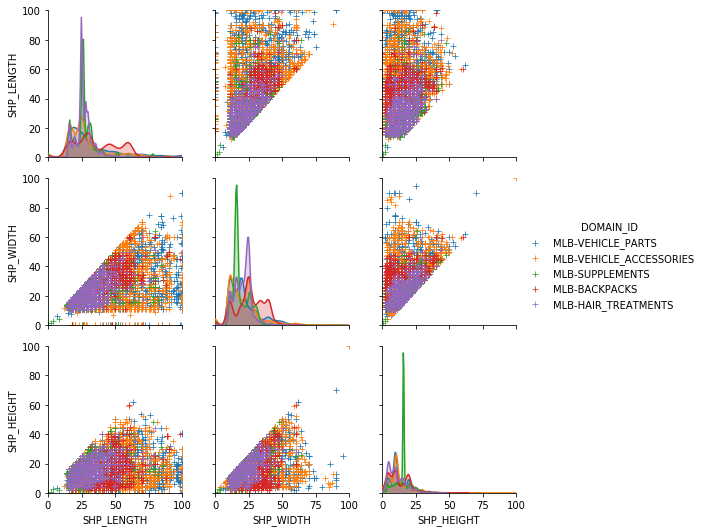

In [30]:
homogeneos = ('MLB-BACKPACKS', 'MLB-HAIR_TREATMENTS', 'MLB-SUPPLEMENTS', 'MLB-VEHICLE_ACCESSORIES', 'MLB-VEHICLE_PARTS')
homog_data = filtrado[filtrado['DOMAIN_ID'].isin(homogeneos)]

plt.figure(figsize=(15,10))
g = seaborn.pairplot( data=homog_data, vars=['SHP_LENGTH', 'SHP_WIDTH', 'SHP_HEIGHT'], hue='DOMAIN_ID', markers='+')
seaborn.despine()
g.set(ylim=(0,100),xlim=(0,100))